In [4]:
#imports
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [5]:
# Data path
path = "../data/raw/tmdb_6000"
os.listdir(path)

['tmdb_6000_movie_credits.csv',
 'tmdb_6000_movie_dataset.csv',
 'tmdb_6000_movie_ratings.csv']

In [17]:
# Loading the Movies Dataset

movies_path = os.path.join(path, "tmdb_6000_movie_dataset.csv")
movies = pd.read_csv(movies_path, low_memory=False)
movies.head()
movies.shape, movies.columns
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5798 non-null   int64  
 1   budget                5798 non-null   int64  
 2   genres                5798 non-null   object 
 3   homepage              2381 non-null   object 
 4   tmdbId                5798 non-null   int64  
 5   keywords              5798 non-null   object 
 6   original_language     5798 non-null   object 
 7   original_title        5798 non-null   object 
 8   overview              5791 non-null   object 
 9   popularity            5798 non-null   float64
 10  production_companies  5798 non-null   object 
 11  production_countries  5798 non-null   object 
 12  release_date          5797 non-null   object 
 13  revenue               5798 non-null   int64  
 14  runtime               5796 non-null   float64
 15  spoken_languages     

In [18]:
#checking missing values
movies.isnull().sum()

Unnamed: 0                 0
budget                     0
genres                     0
homepage                3417
tmdbId                     0
keywords                   0
original_language          0
original_title             0
overview                   7
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                 1072
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [20]:
#duplicate titles
movies["title"].duplicated().sum()

np.int64(44)

In [21]:
#checking release years
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year
movies['release_year'].describe()


count    5797.000000
mean     2005.054166
std        13.373277
min      1916.000000
25%      2000.000000
50%      2007.000000
75%      2014.000000
max      2023.000000
Name: release_year, dtype: float64

In [22]:
#genres
movies['genres'].head(10)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
5    [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...
6    [{"id": 16, "name": "Animation"}, {"id": 10751...
7    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
8    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
9    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

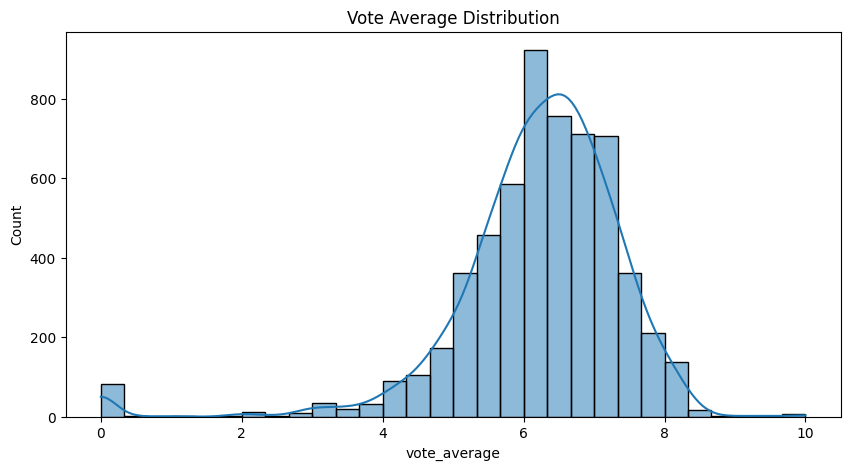

In [23]:
#Rating distribution
plt.figure(figsize=(10,5))
sns.histplot(movies['vote_average'], bins=30, kde=True)
plt.title("Vote Average Distribution")
plt.show()


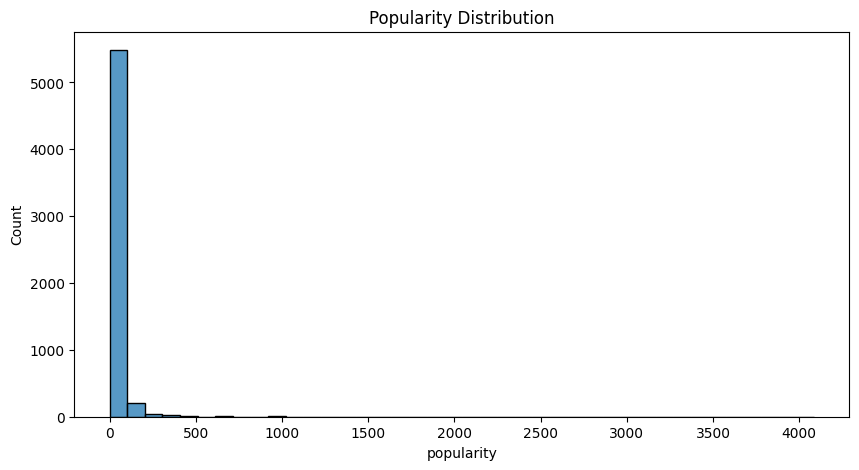

In [24]:
#popularity distribution
plt.figure(figsize=(10,5))
sns.histplot(movies['popularity'], bins=40)
plt.title("Popularity Distribution")
plt.show()
